In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "train.csv"  # Replace with the correct path to your dataset
df = pd.read_csv(file_path)

# 1. Dataset Overview
print("\nDataset Info:\n")
df.info()

print("\nSummary Statistics:\n")
print(df.describe())

print("\nChecking for Missing Values:\n")
print(df.isnull().sum())

# Convert 'timestamp' to datetime
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    print("\nTimestamp column converted to datetime.")

# Get the date range and shape of the dataset
date_range = (df['timestamp'].min(), df['timestamp'].max()) if 'timestamp' in df.columns else None
dataset_shape = df.shape

print("Date Range:", date_range)
print("Dataset Shape:", dataset_shape)





Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122438 entries, 0 to 2122437
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   timestamp               int64  
 1   open                    float64
 2   high                    float64
 3   low                     float64
 4   close                   float64
 5   volume                  float64
 6   quote_asset_volume      float64
 7   number_of_trades        float64
 8   taker_buy_base_volume   float64
 9   taker_buy_quote_volume  float64
 10  target                  float64
dtypes: float64(10), int64(1)
memory usage: 178.1 MB

Summary Statistics:

          timestamp          open          high           low         close  \
count  2.122438e+06  2.122438e+06  2.122438e+06  2.122438e+06  2.122438e+06   
mean   1.589144e+09  4.971020e-01  4.976028e-01  4.965936e-01  4.971011e-01   
std    3.676171e+07  3.147919e-01  3.152553e-01  3.143317e-01  3.147945e-01   

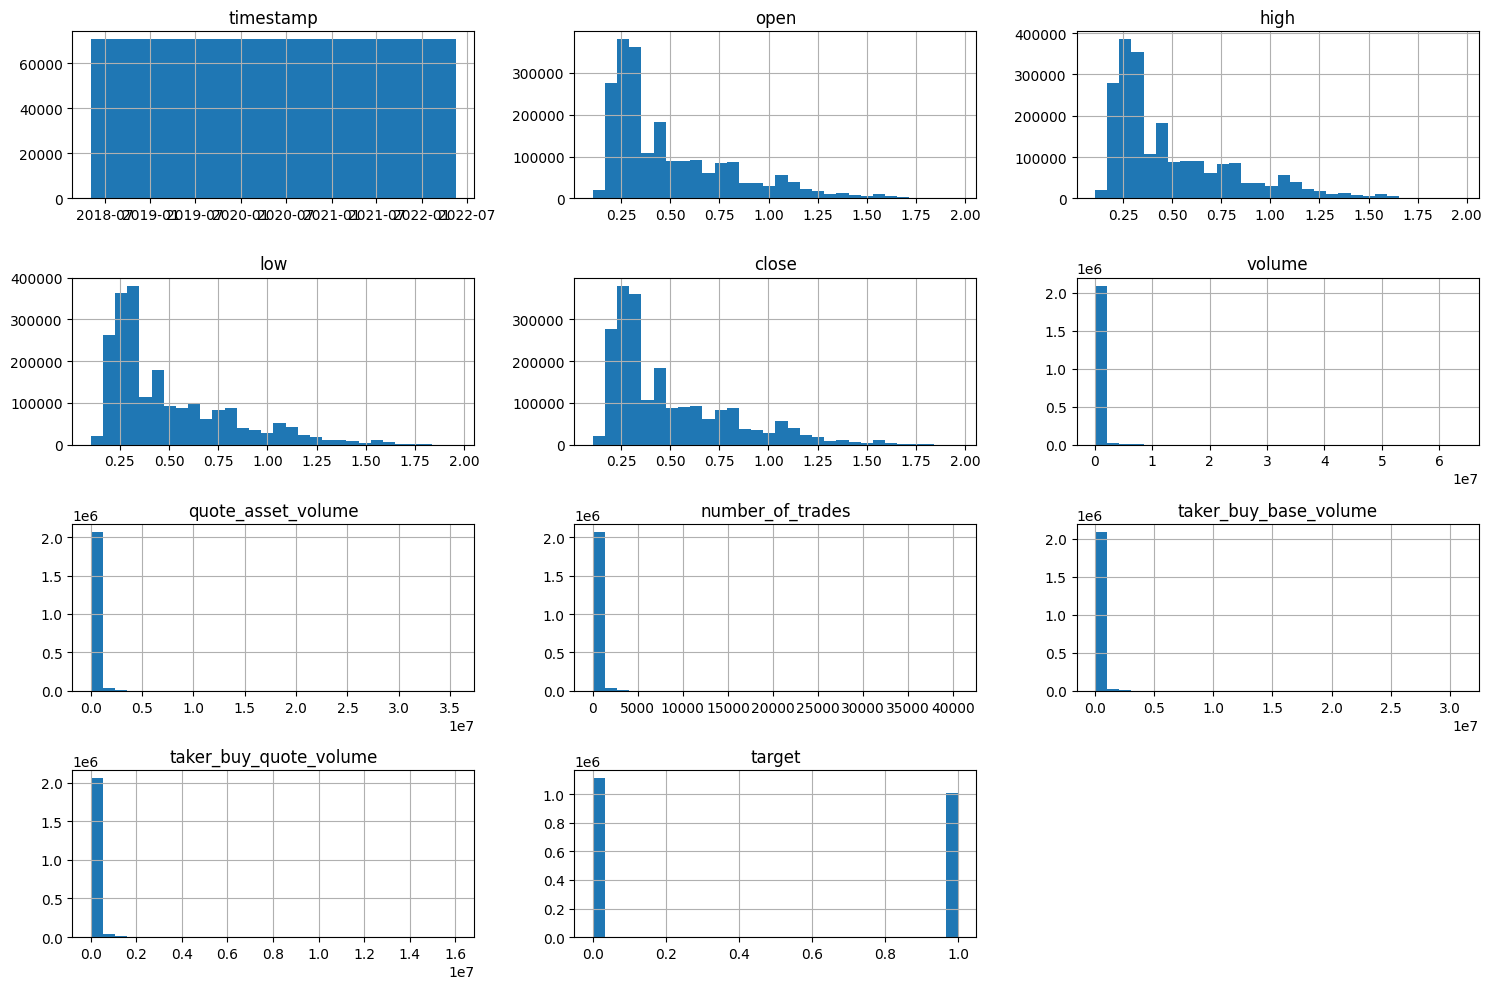

In [15]:
# 2. Univariate Analysis
# Distribution of numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()



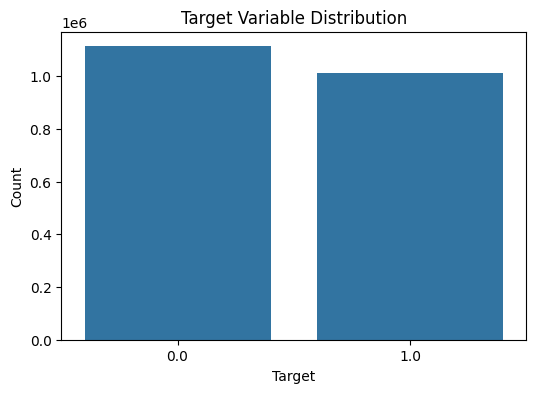

In [16]:
# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target')
plt.title("Target Variable Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.savefig('target_distribution.png')
plt.show()



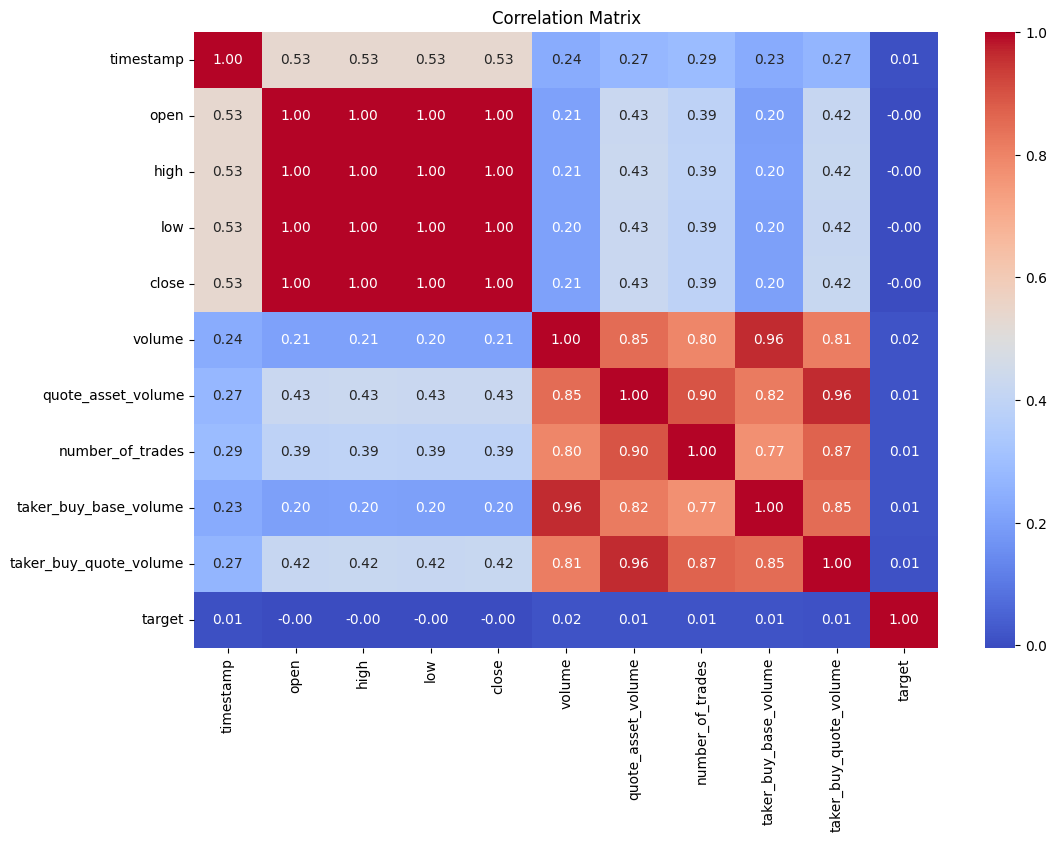

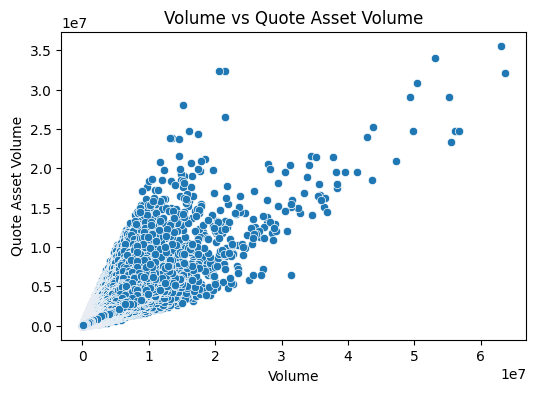

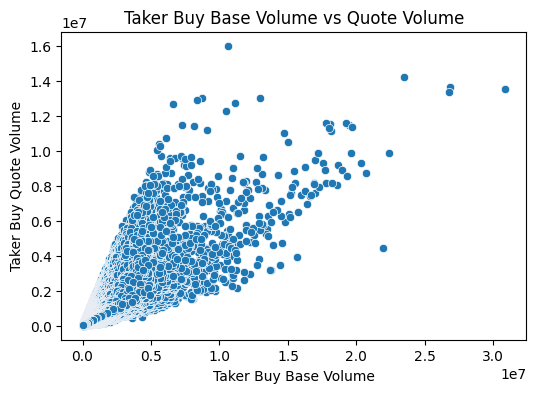

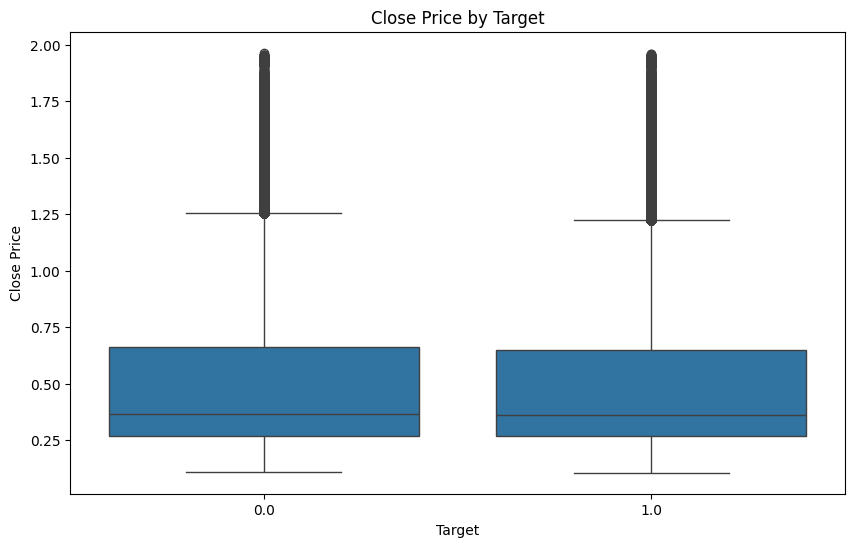

In [17]:
# 3. Multivariate Analysis
# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig('correlation_matrix.png')
plt.show()

# Scatter plots for feature relationships
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='volume', y='quote_asset_volume')
plt.title("Volume vs Quote Asset Volume")
plt.xlabel("Volume")
plt.ylabel("Quote Asset Volume")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='taker_buy_base_volume', y='taker_buy_quote_volume')
plt.title("Taker Buy Base Volume vs Quote Volume")
plt.xlabel("Taker Buy Base Volume")
plt.ylabel("Taker Buy Quote Volume")
plt.show()

# Target vs Features (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='close')
plt.title("Close Price by Target")
plt.xlabel("Target")
plt.ylabel("Close Price")
plt.savefig('close_price_by_target.png')
plt.show()




Price Range column created.

Price Change column created.


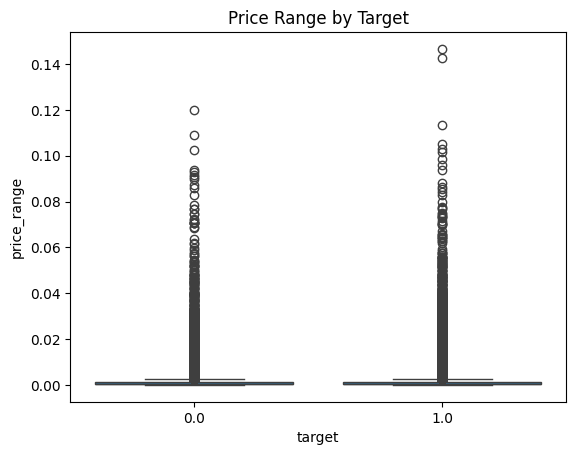

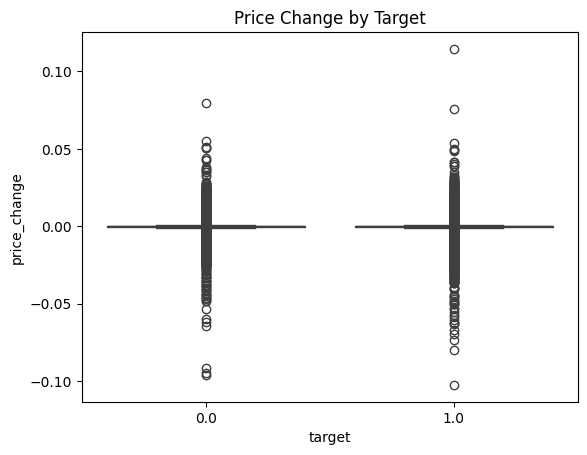

In [18]:
# 4. Feature Engineering Insights
# Derived features
if 'high' in df.columns and 'low' in df.columns:
    df['price_range'] = df['high'] - df['low']
    print("\nPrice Range column created.")

if 'close' in df.columns and 'open' in df.columns:
    df['price_change'] = df['close'] - df['open']
    print("\nPrice Change column created.")

sns.boxplot(x='target', y='price_range', data=df)
plt.title("Price Range by Target")
plt.show()

sns.boxplot(x='target', y='price_change', data=df)
plt.title("Price Change by Target")
plt.show()

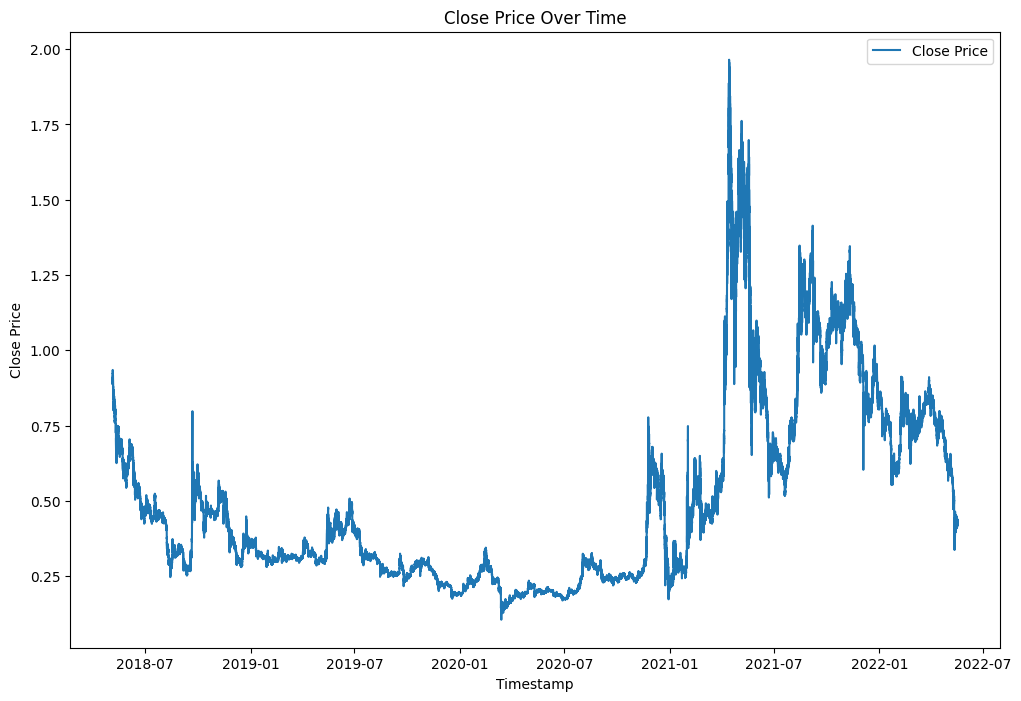

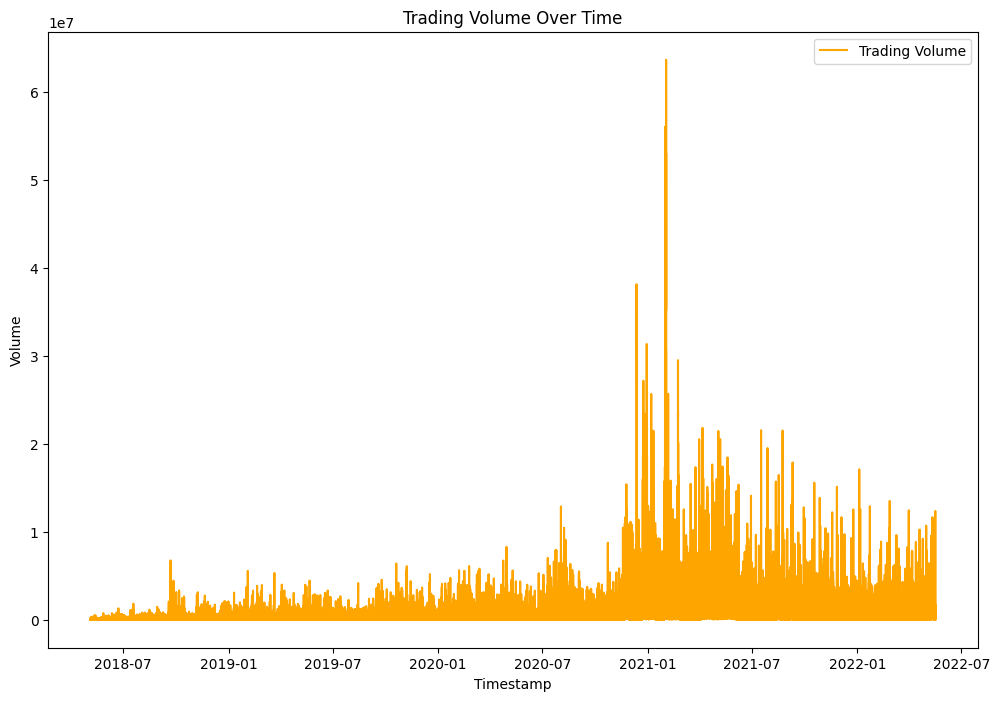

In [19]:
# 5. Time-Series Analysis
if 'timestamp' in df.columns:
    plt.figure(figsize=(12, 8))
    plt.plot(df['timestamp'], df['close'], label='Close Price')
    plt.title("Close Price Over Time")
    plt.xlabel("Timestamp")
    plt.ylabel("Close Price")
    plt.legend()
    plt.savefig('price_over_time.png')
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(df['timestamp'], df['volume'], label='Trading Volume', color='orange')
    plt.title("Trading Volume Over Time")
    plt.xlabel("Timestamp")
    plt.ylabel("Volume")
    plt.legend()
    plt.savefig('volume_over_time.png')
    plt.show()




Checking for any correlations between features and the target:

timestamp                 0.005468
open                     -0.004030
high                     -0.003995
low                      -0.004087
close                    -0.004100
volume                    0.015103
quote_asset_volume        0.012075
number_of_trades          0.014019
taker_buy_base_volume     0.013395
taker_buy_quote_volume    0.010717
target                    1.000000
Name: target, dtype: float64


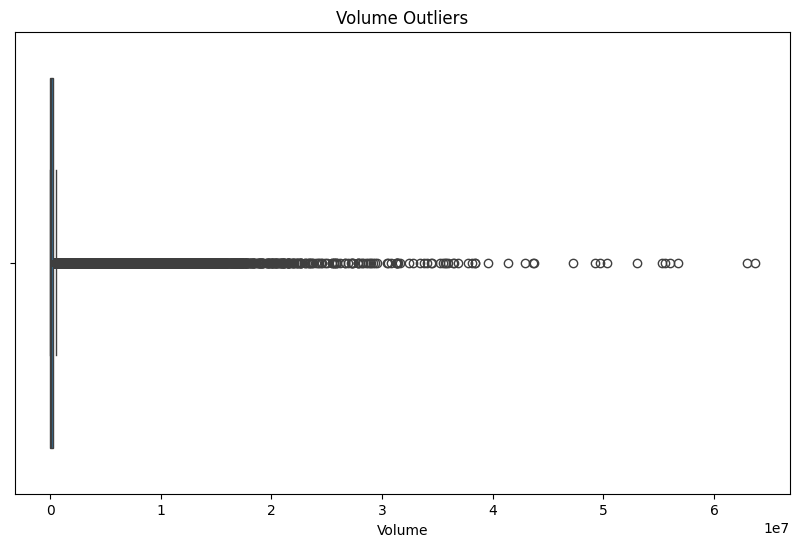

In [20]:
# 6. Check for Data Leakage
print("\nChecking for any correlations between features and the target:\n")
print(corr_matrix['target'])

# 7. Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='volume')
plt.title("Volume Outliers")
plt.xlabel("Volume")
plt.savefig('volume_outliers.png')
plt.show()

